The point of this notebook is to look at traces of different length and
experiment with different methods of diagnosing them, with the ultimate aim of seeing that they converge properly
Perhaps we will move on to evaluating the traces

In [1]:
import pymc_model as pm
import pymc
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import latin_hypercube as lh

This study is only focusing on glaciers ['03473'] in region [15].
(1, 882) (882,)
[ 0.] (1,)


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Upload different databases, each with its own sample length

In [2]:
s1 = pymc.database.pickle.load('testlength1000.pickle')
s3 = pymc.database.pickle.load('testlength3000.pickle')
s5 = pymc.database.pickle.load('testlength5000.pickle')
s10 = pymc.database.pickle.load('testlength10000.pickle')
s20 = pymc.database.pickle.load('testlength20000.pickle')
s30 = pymc.database.pickle.load('testlength30000.pickle')
sample_dict = {'1000':s1, '3000':s3, '5000':s5, '10000':s10, '20000':s20, '30000':s30}

Start by comaring the means and standard deviations of each database

In [7]:
for key, value in sample_dict.items():
    mean = np.mean(value.trace('mass_bal')[:])
    std = np.std(value.trace('mass_bal')[:])
    print(key + ' samples:', mean, std)

1000 samples: -0.522492727925 0.226317110374
3000 samples: -0.533786170736 0.229247203142
5000 samples: -0.540335249823 0.246009182266
10000 samples: -0.542129352987 0.238868492805
20000 samples: -0.537587869747 0.235373493829
30000 samples: -0.537529193419 0.236690568258


Use the built in pymc function to look at summary statistics for each variable. 
I was told that MC error should be less than 1% of mean, which is not actually 
a condition that is met even in the 10000 sample

In [10]:
for key, value in sample_dict.items():
    print(key + ' samples:')
    m = pymc.MCMC(pm, db=value)
    m.summary()

1000 samples:

tempchange:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.358           0.803            0.078            [-1.963  1.037]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-2.171           -0.864          -0.241         0.215         0.898
	

ddfsnow:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	0.004            0.001            0.0              [ 0.002  0.006]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	0.002            0.003           0.004          0.005         0.007
	

precfactor:
 
	Mean             SD               MC Error        95% HPD inter

/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/tushar/ana

Use the built in pymc plot function to look at the traces and autocorrelations, and the probability distributions

1000 samples:
Plotting precfactor
3000 samples:
Plotting precfactor
5000 samples:
Plotting precfactor
10000 samples:
Plotting precfactor
20000 samples:
Plotting precfactor
30000 samples:
Plotting precfactor


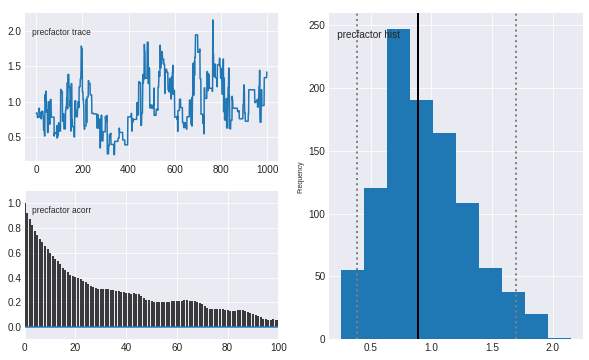

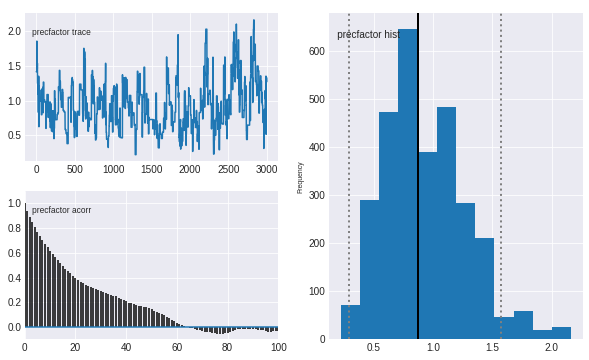

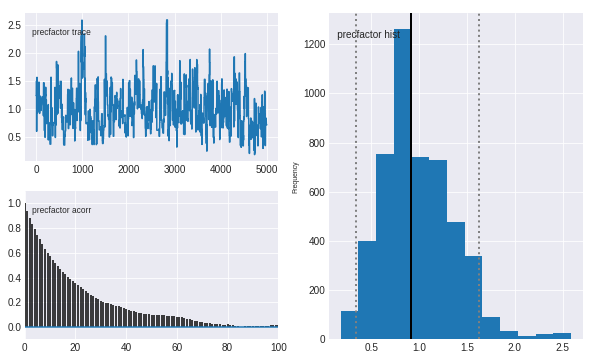

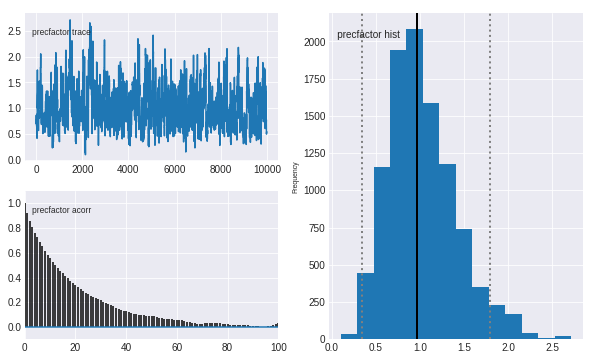

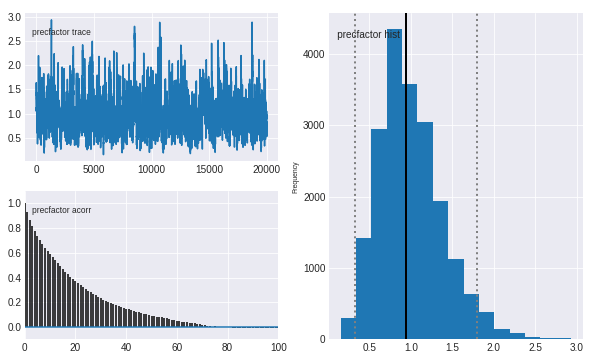

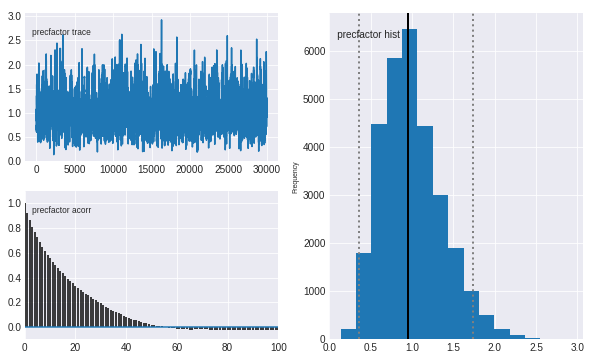

In [5]:
for key, value in sample_dict.items():
    print(key + ' samples:')
    m = pymc.MCMC(pm, db=value)
    pymc.Matplot.plot(m.precfactor)

Use the built in raftery lewis method to see what dignostics are for each chain

In [12]:
for key, value in sample_dict.items():
    print(key + ' samples:')
    m = pymc.MCMC(pm, db=value)
    data = pymc.raftery_lewis(m, q=0.025, r=0.01)
    print(data)


1000 samples:

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

39 iterations to be discarded at the beginning of the simulation (burn-in).

10486 subsequent iterations required.

Thinning factor of 8 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

68 iterations to be discarded at the beginning of the simulation (burn-in).

23405 subsequent iterations required.

Thinning factor of 9 required to produce an independence chain.

Raftery-Lewis Diagnostic

937 iterations required (assuming independence) to achieve 0.01 accuracy with 95 percent probability.

Thinning factor of 1 required to produce a first-order Markov chain.

42 iterations to be discar

In [13]:
for key, value in sample_dict.items():
    print(key + ' samples:')
    m = pymc.MCMC(pm, db=value)
    data = pymc.gelman_rubin(m)
    print(data)

1000 samples:


ValueError: Gelman-Rubin diagnostic requires multiple chains of the same length.

Use the built in Geweke plot function to determine lack of convergence




1000 samples:
3000 samples:
5000 samples:
10000 samples:
20000 samples:
30000 samples:


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


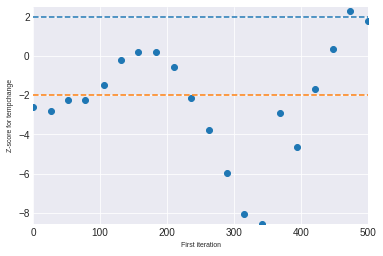

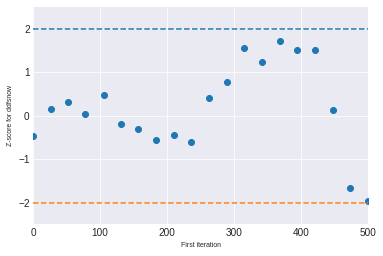

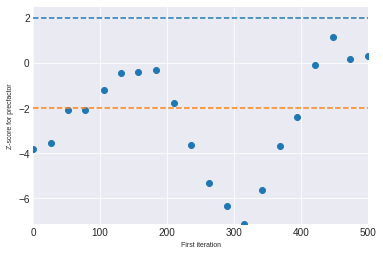

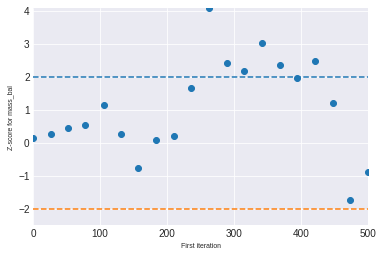

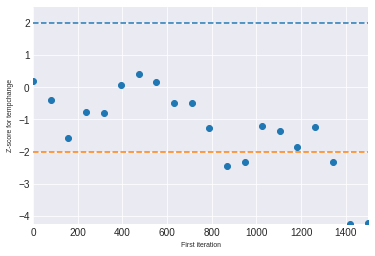

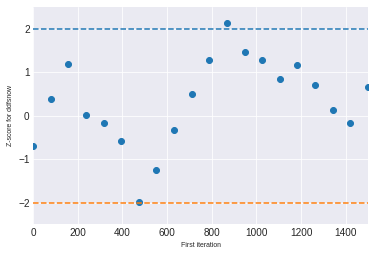

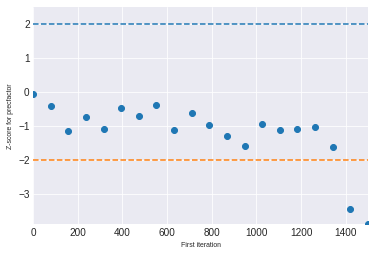

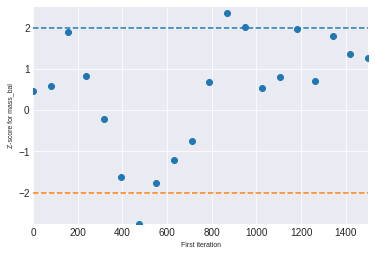

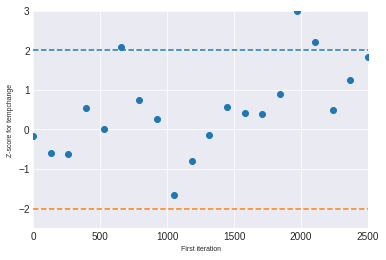

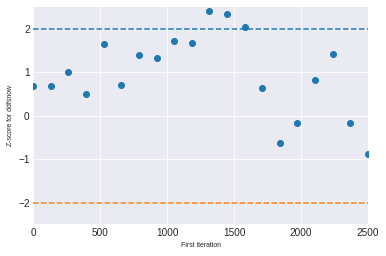

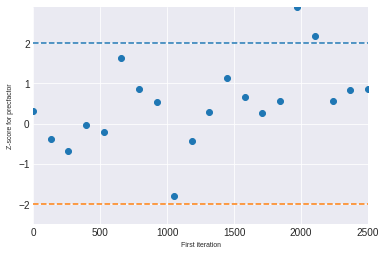

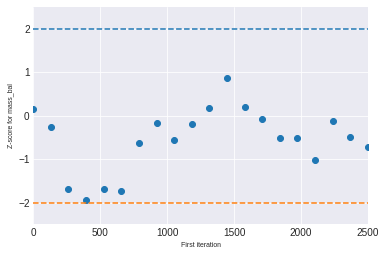

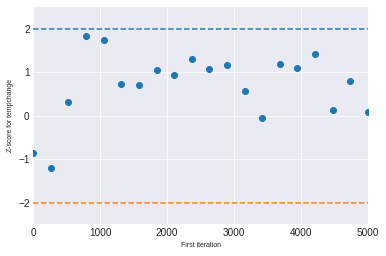

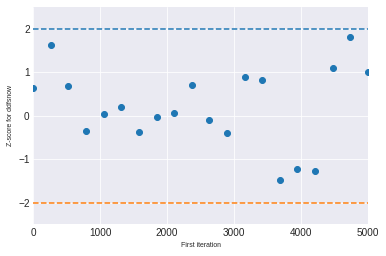

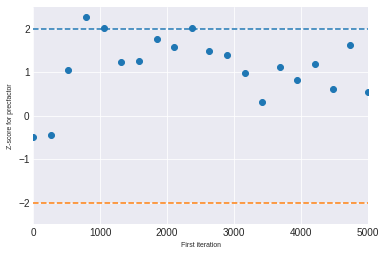

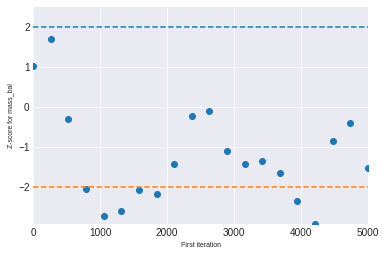

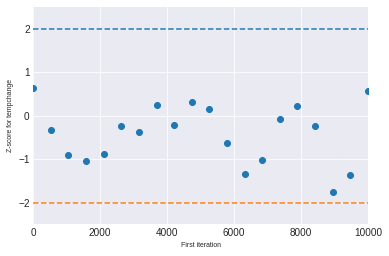

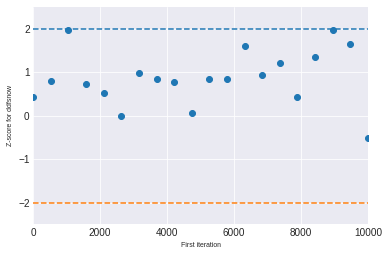

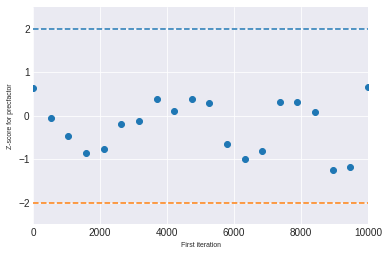

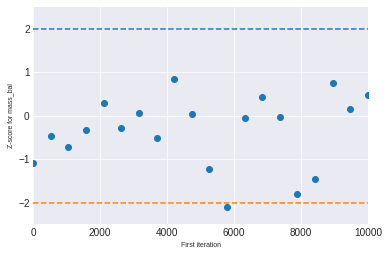

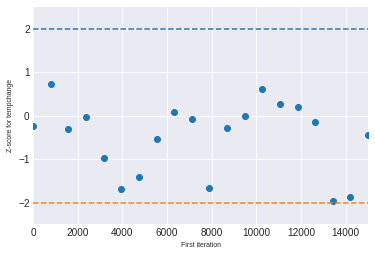

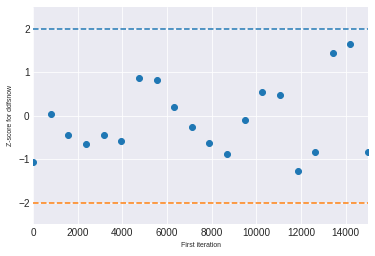

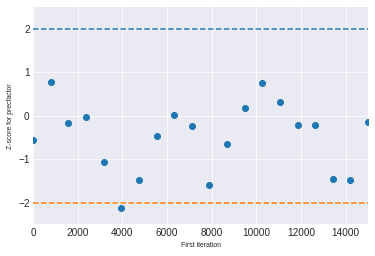

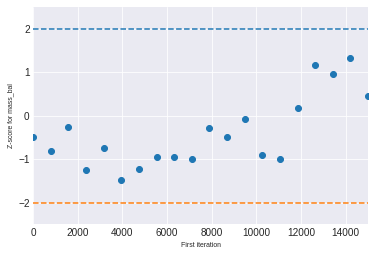

In [14]:
for key, value in sample_dict.items():
    print(key + ' samples:')
    m = pymc.MCMC(pm, db=value)
    pymc.Matplot.geweke_plot(pymc.geweke(m))

This is a  crude results based 'diagnostic', in which we use the results to run ensembles of mass balance calculations and see how different they are

We first look at a 'true' latin hypercube sampling, in which we sample for the probability distributions independently,
using an LH algorithm, and then look at the ensemble means and standard deviations

In [17]:
for key, value in sample_dict.items():
    tempchange = value.trace('tempchange')[:]
    precfactor = value.trace('precfactor')[:]
    ddfsnow = value.trace('ddfsnow')[:]
    massbal = value.trace('mass_bal')[:]
    samples = lh.sample1(tempchange=tempchange, precfactor=precfactor,
                     ddfsnow=ddfsnow, samples=300)
    result = lh.find_mass_balace(samples)
    mean = np.mean(result['massbal'])
    std = np.std(result['massbal'])
    print(key + ' samples, mean:', mean, 'std:', std)

1000 samples, mean: -0.49360707496248174 std: 0.6491143988581548
3000 samples, mean: -0.5093186296205379 std: 0.6076172404816249
5000 samples, mean: -0.5264005791235634 std: 0.7317751456129489
10000 samples, mean: -0.5201618644995872 std: 0.7543076207720659
20000 samples, mean: -0.5120965455476093 std: 0.7515917773730597
30000 samples, mean: -0.5184441059516737 std: 0.6583422539349708


Now we look at a sampling of parameter sets over the space of the Markov chain; ie, we look at the mass balance value that each parameter set leads to, we sort the mass balance values, section them into chunks of equal probability, and randomly sample from each chunk. This gives us a 'stratified' sampling that covers the space of mass balance values but does so with the same mean and standard deviation that the entire chain does. 

In [3]:
for key, value in sample_dict.items():
    tempchange = value.trace('tempchange')[:]
    precfactor = value.trace('precfactor')[:]
    ddfsnow = value.trace('ddfsnow')[:]
    massbal = value.trace('mass_bal')[:]
    result = lh.sample2(tempchange=tempchange, precfactor=precfactor,
                     ddfsnow=ddfsnow, massbal=massbal, samples=300)
    mean = np.mean(result['massbal'])
    std = np.std(result['massbal'])
    print(key + ' samples, mean:', mean, 'std:', std)

1000 samples, mean: -0.5227534251727336 std: 0.22607099942770978
3000 samples, mean: -0.5337379611723849 std: 0.22895910291297736
5000 samples, mean: -0.5406204812812087 std: 0.24640795545391148
10000 samples, mean: -0.5424125045090036 std: 0.24008879022990756
20000 samples, mean: -0.537568305039035 std: 0.2344445997954401
30000 samples, mean: -0.537541991794227 std: 0.23530090167952158


Now we look at the traces of each variable (thinned down) in the samples of different samples to see whether they have achieved a 'grassy' state, which is what we would expect as the chain converges

1000 samples:
tempchange plot:
precfactor plot:
ddfsnow plot:
mass_bal plot:
3000 samples:
tempchange plot:
precfactor plot:
ddfsnow plot:
mass_bal plot:
5000 samples:
tempchange plot:
precfactor plot:
ddfsnow plot:
mass_bal plot:
10000 samples:
tempchange plot:
precfactor plot:
ddfsnow plot:
mass_bal plot:
20000 samples:
tempchange plot:
precfactor plot:
ddfsnow plot:
mass_bal plot:
30000 samples:
tempchange plot:
precfactor plot:
ddfsnow plot:
mass_bal plot:


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


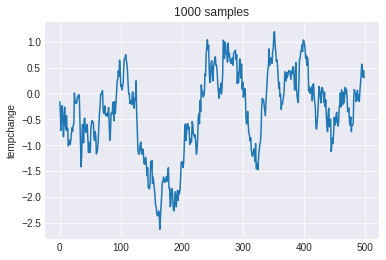

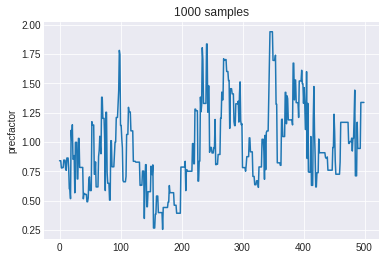

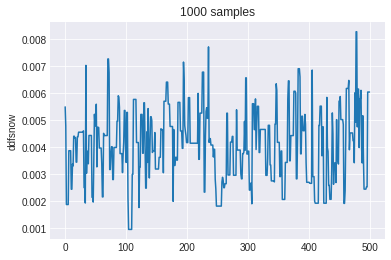

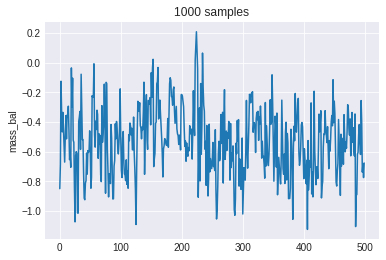

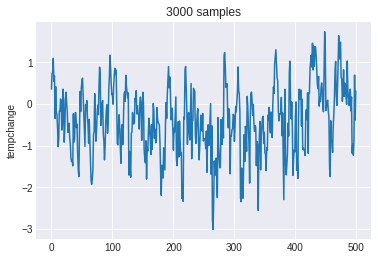

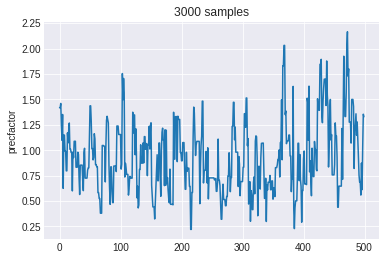

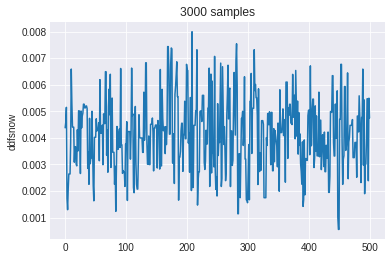

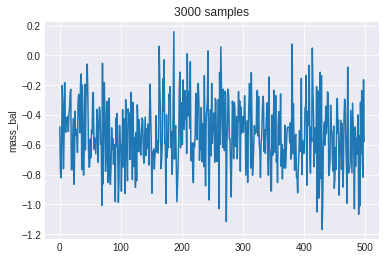

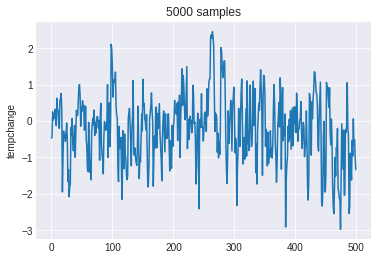

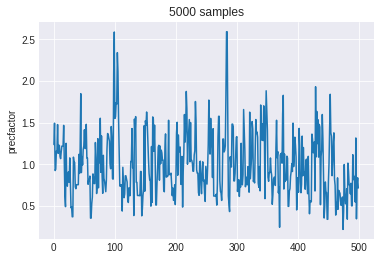

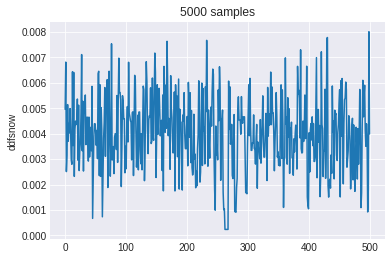

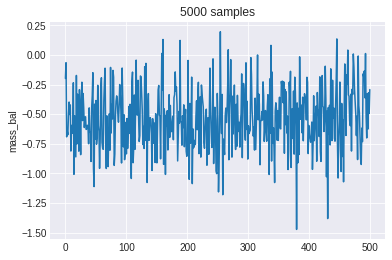

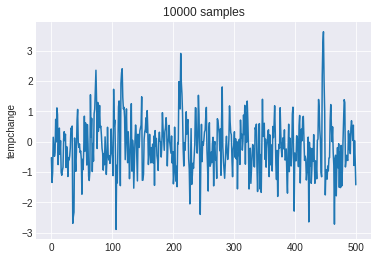

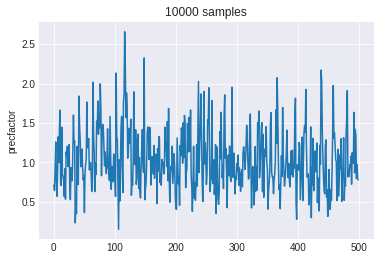

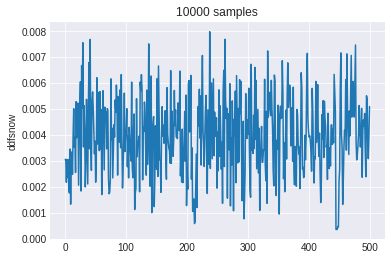

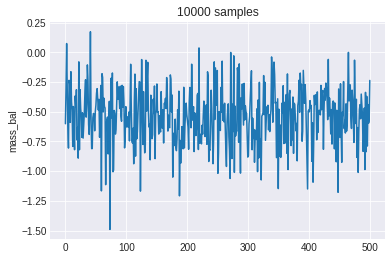

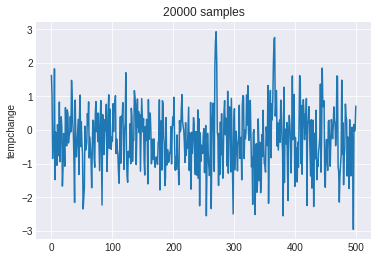

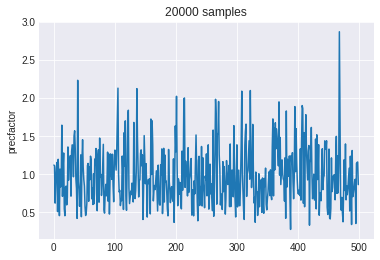

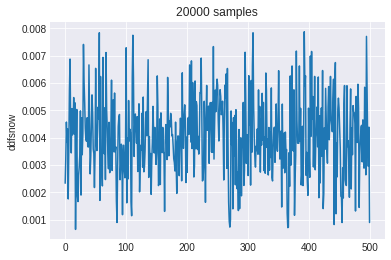

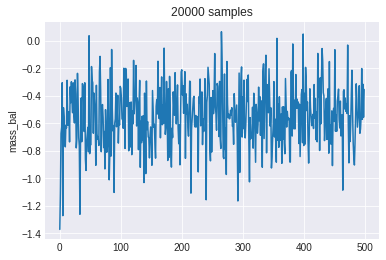

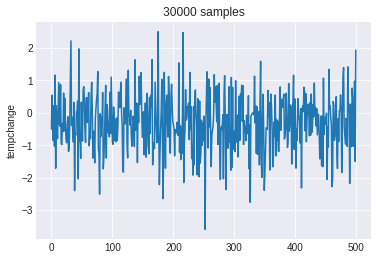

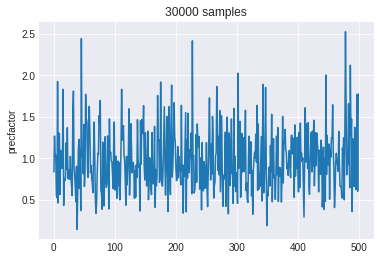

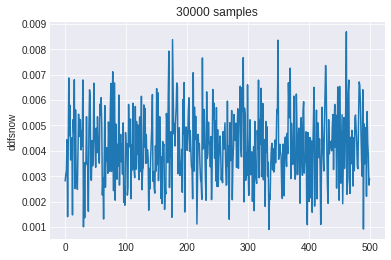

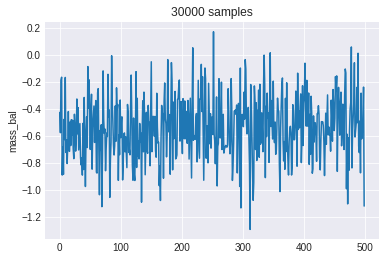

In [20]:
variables = ['tempchange', 'precfactor', 'ddfsnow', 'mass_bal']
for key, value in sample_dict.items():
    print(key + ' samples:')
    for variable in variables:
        trace = value.trace(variable)[:]
        print(variable + ' plot:')
        plt.figure()
        plt.title(key + ' samples')
        plt.ylabel(variable)
        plt.plot(trace[::(len(trace)//500)])

In [8]:
s1

In [15]:
print(s1.trace['tempchange'])

TypeError: 'method' object is not subscriptable

In [59]:
db = pymc.MCMC(pm, db=s10)

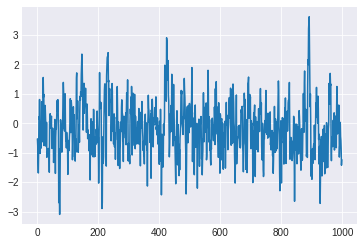

In [52]:
plt.plot(db.trace('tempchange')[::10])

In [19]:
m.sample(10)

 [------------------110%-------------------] 11 of 10 complete in 6.6 sec

In [41]:
m2 = pymc.MCMC(pm, db=s1)

In [43]:
m.variables

{<pymc.PyMCObjects.Deterministic 'mass_bal' at 0x7f68f4fbd978>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'tempchange' at 0x7f68f4fbdf28>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'precfactor' at 0x7f68f3ee34a8>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'obs_massbal' at 0x7f68f4fbdc50>,
 <pymc.distributions.new_dist_class.<locals>.new_class 'ddfsnow' at 0x7f695189c400>}

In [45]:
m2.trace[:]


tempchange:
 
	Mean             SD               MC Error        95% HPD interval
	------------------------------------------------------------------
	-0.358           0.803            0.078            [-1.963  1.037]
	
	
	Posterior quantiles:
	
	2.5             25              50              75             97.5
	 |---------------|===============|===============|---------------|
	-2.171           -0.864          -0.241         0.215         0.898
	


/home/tushar/anaconda3/envs/pymc/lib/python3.6/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
